# Project-2
---

In [5]:
import numpy as np
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [6]:
df=pd.read_csv('/Users/andreapercy/Documents/Georgian related/assignments/sem 2/NeuralNtwk-Arch/Assignment2/CreditCardDataset.csv')

In [7]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
1,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
2,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
3,11,1.069374,0.287722,0.828613,2.712520,-0.178398,0.337544,-0.096717,0.115982,-0.221083,...,-0.036876,0.074412,-0.071407,0.104744,0.548265,0.104094,0.021491,0.021293,27.50,0
4,12,-0.752417,0.345485,2.057323,-1.468643,-1.158394,-0.077850,-0.608581,0.003603,-0.436167,...,0.499625,1.353650,-0.256573,-0.065084,-0.039124,-0.087086,-0.180998,0.129394,15.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57350,172751,2.085387,-0.033624,-1.706889,-0.015100,0.644669,-0.245303,0.125758,-0.156508,0.277994,...,0.256304,0.862281,-0.063211,0.143339,0.361885,-0.124856,-0.025472,-0.066836,2.27,0
57351,172760,-6.713826,2.369104,-3.534768,-0.368259,-1.721030,-1.322808,-0.190876,0.891149,2.068476,...,0.131247,0.994246,-0.002140,-0.072979,-0.167159,-0.387271,-2.616341,0.474584,19.59,0
57352,172768,-2.076175,2.142238,-2.522704,-1.888063,1.982785,3.732950,-1.217430,-0.536644,0.272867,...,2.016666,-1.588269,0.588482,0.632444,-0.201064,0.199251,0.438657,0.172923,8.95,0
57353,172770,2.007418,-0.280235,-0.208113,0.335261,-0.715798,-0.751373,-0.458972,-0.140140,0.959971,...,-0.208260,-0.430347,0.416765,0.064819,-0.608337,0.268436,-0.028069,-0.041367,3.99,0


**EDA**
---

In [8]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

**None of the features in the dataset show null data**

In [9]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
57350    False
57351    False
57352    False
57353    False
57354    False
Length: 57355, dtype: bool

**The dataset doesn't seem to have duplicate values**

In [10]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,...,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000
mean,94577.357074,-0.029092,0.030156,-0.055749,0.035521,-0.022664,-0.006869,-0.032448,0.006142,-0.017667,...,0.005569,-0.000265,0.003273,0.001159,0.005003,0.003133,0.000226,-0.000625,88.825575,0.008578
std,47505.713234,2.061391,1.711228,1.733364,1.484621,1.508300,1.361819,1.504317,1.334058,1.131679,...,0.813950,0.734597,0.625238,0.604653,0.519852,0.482496,0.433713,0.323980,279.496913,0.092221
min,2.000000,-36.802320,-63.344698,-48.325589,-5.519697,-113.743307,-19.996349,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-32.828995,-2.822384,-8.696627,-2.534330,-8.878665,-15.430084,0.000000,0.000000
25%,53943.500000,-0.927615,-0.588747,-0.922554,-0.839400,-0.692157,-0.774796,-0.558211,-0.207145,-0.651869,...,-0.226932,-0.541278,-0.161812,-0.354648,-0.312164,-0.322536,-0.070642,-0.052695,5.475000,0.000000
50%,84641.000000,0.015980,0.071801,0.168619,-0.005637,-0.055913,-0.276163,0.035797,0.024380,-0.053373,...,-0.028379,0.004681,-0.011439,0.041286,0.021494,-0.049135,0.000859,0.011169,21.990000,0.000000
75%,139140.000000,1.314129,0.815413,1.019384,0.764271,0.607021,0.387408,0.562758,0.333358,0.599522,...,0.190245,0.529286,0.147282,0.439244,0.352590,0.243882,0.091355,0.078500,76.900000,0.000000
max,172777.000000,2.454930,22.057729,3.940337,16.715537,28.762671,73.301626,120.589494,20.007208,10.348407,...,27.202839,10.503090,22.528412,4.584549,5.826159,3.517346,31.612198,15.866721,25691.160000,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57355 entries, 0 to 57354
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    57355 non-null  int64  
 1   V1      57355 non-null  float64
 2   V2      57355 non-null  float64
 3   V3      57355 non-null  float64
 4   V4      57355 non-null  float64
 5   V5      57355 non-null  float64
 6   V6      57355 non-null  float64
 7   V7      57355 non-null  float64
 8   V8      57355 non-null  float64
 9   V9      57355 non-null  float64
 10  V10     57355 non-null  float64
 11  V11     57355 non-null  float64
 12  V12     57355 non-null  float64
 13  V13     57355 non-null  float64
 14  V14     57355 non-null  float64
 15  V15     57355 non-null  float64
 16  V16     57355 non-null  float64
 17  V17     57355 non-null  float64
 18  V18     57355 non-null  float64
 19  V19     57355 non-null  float64
 20  V20     57355 non-null  float64
 21  V21     57355 non-null  float64
 22

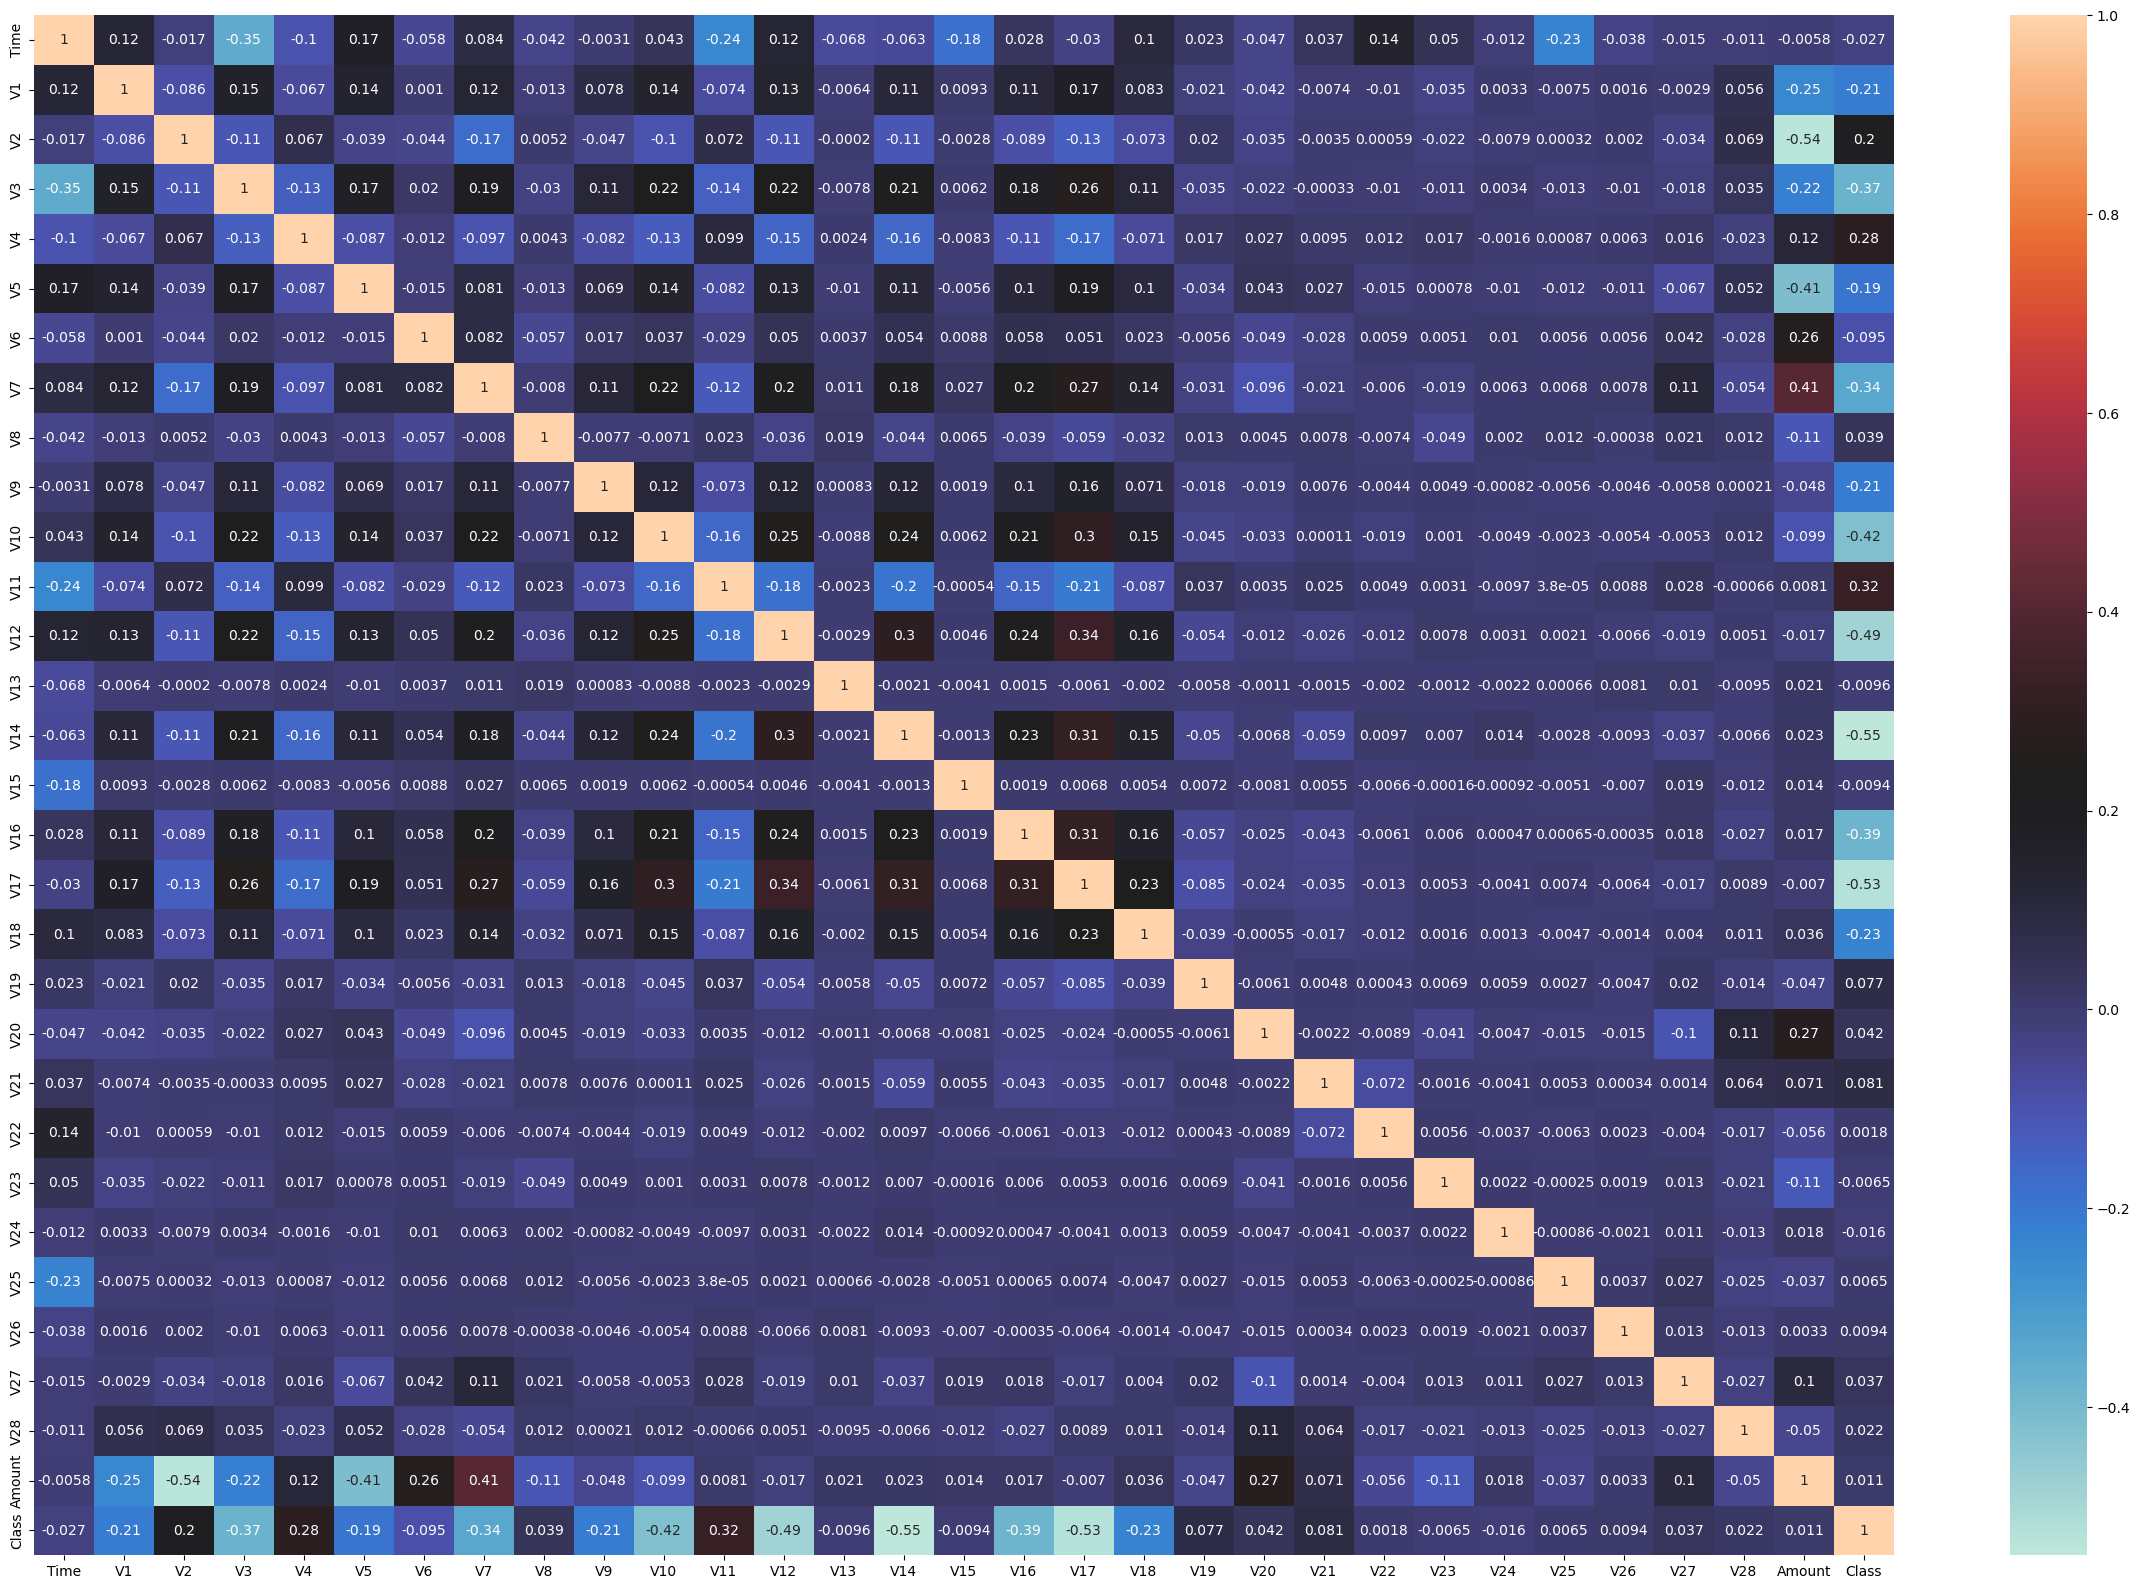

In [12]:
corr=df.corr()
plt.figure(figsize=(30,20))
sea.heatmap(corr,cmap='icefire',annot=True)
plt.show()

**Looking at this graph one thing is evident that there are many features which have negative correlation. So in the next step such features are removed**

In [13]:
delcol=['V2','V4','V6','V8','V11','V13','V15','V19', 'V20','V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']
for i in delcol:
    del df[i]

In [14]:
df.columns

Index(['Time', 'V1', 'V3', 'V5', 'V7', 'V9', 'V10', 'V12', 'V14', 'V16', 'V17',
       'V18', 'Amount', 'Class'],
      dtype='object')

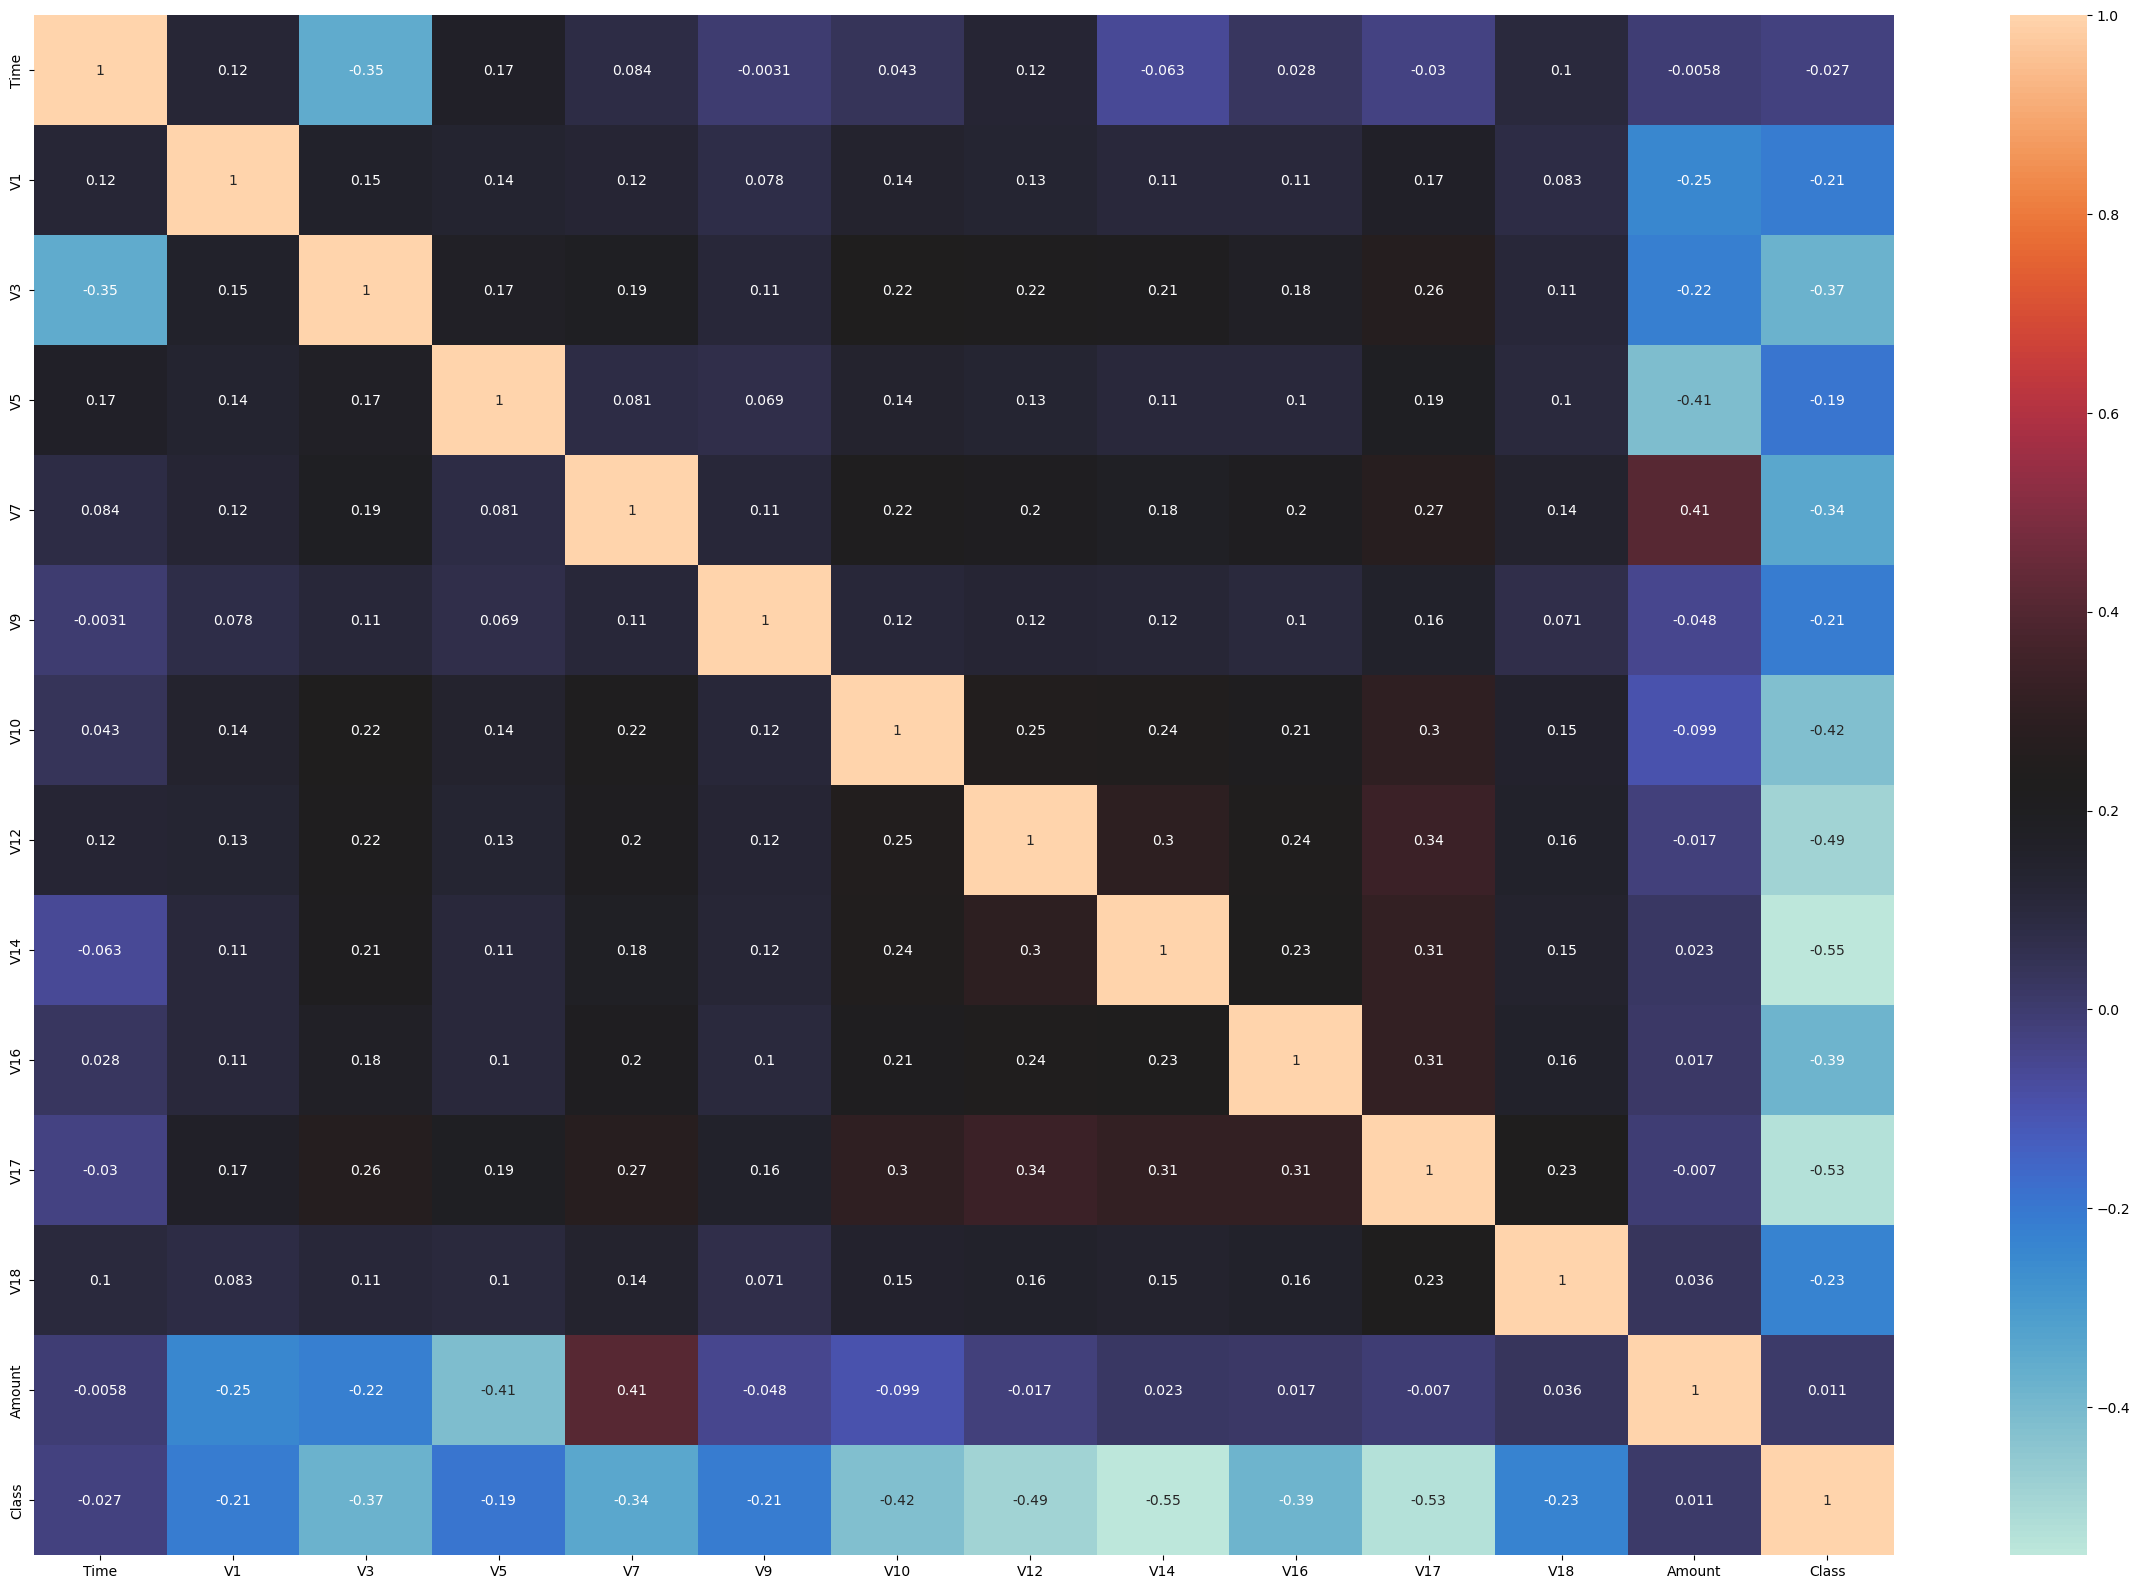

In [15]:
corr=df.corr()
plt.figure(figsize=(30,20))
sea.heatmap(corr,cmap='icefire',annot=True)
plt.show()

**Removed all the cells that had negative correlation**

In [22]:
df.columns

Index(['Time', 'V1', 'V3', 'V5', 'V7', 'V9', 'V10', 'V12', 'V14', 'V16', 'V17',
       'V18', 'Amount', 'Class'],
      dtype='object')

In [ ]:
class_distribution = df['Class'].value_counts()
print(class_distribution)


**Checking for imbalance** 

In [ ]:

class_distribution = df['Class'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(class_distribution.index, class_distribution.values)
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(class_distribution.index, ["Negative (0)", "Positive (1)"])
plt.title("Class Distribution")
plt.show()


**The graph shows a very evident imbalance between the positive and negative class**

**Handling the imbalance**

In [ ]:
negative = df[df['Class'] == 1]
positive = df[df['Class'] == 0]

In [ ]:
up_p = resample(negative, replace=True, n_samples=len(positive), random_state=42)

In [ ]:
new_df = pd.concat([positive, up_p])

In [ ]:
class_distribution = new_df['Class'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(class_distribution.index, class_distribution.values)
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(class_distribution.index, ["Negative (0)", "Positive (1)"])
plt.title("Class Distribution")
plt.show()


**The dataset has been successfully balanced**

In [ ]:
new_df_shuffled=shuffle(new_df,random_state=42)

In [ ]:
X =new_df_shuffled.drop("Class", axis=1)
y = new_df_shuffled["Class"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

**Creating the neural network using pytorch also calculating training and validation loss as well as training and validation accuracy**
--

In [ ]:
input_size = X_train.shape[1] 
hidden_size = 128
num_classes = 2

model = NeuralNetwork(input_size, hidden_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

X_val_tensor = torch.Tensor(X_val)
y_val_tensor = torch.LongTensor(y_val.to_numpy())
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=64)

train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = 100 * correct / total
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)

    print(f"Epoch [{epoch + 1}/{num_epochs}] - Training Loss: {epoch_loss:.4f} - Training Accuracy: {epoch_accuracy:.2f}%")
    
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(val_loader)
    epoch_accuracy = 100 * correct / total
    val_losses.append(epoch_loss)
    val_accuracies.append(epoch_accuracy)

    print(f"Epoch [{epoch + 1}/{num_epochs}] - Validation Loss: {epoch_loss:.4f} - Validation Accuracy: {epoch_accuracy:.2f}%")

plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation Loss')
plt.legend()
plt.show()

plt.plot(range(1, num_epochs + 1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and validation Accuracy')
plt.legend()
plt.show()

**Conclusion**
--

**The given dataset was cleaned and observed**

**There was a huge imbalance in the dataset and the same was handled by using the method of upsampling**

**The neural network was created using pytorch having the input layers equal to the number of features,number of hidden layers were  128 and the number of classes was 2 owing to the risk factors which either being 1 or 0**

**The training/validation accuracy along with The training/validation losss was measured**

**From the Training and validation Loss graph we see that the training loss and validaton loss has reduced over the 10 epochs. And another thing to notice would be that the validation loss was much lower than the train loss which is very good**

**From the Training and validation Accuracy graph we can note that training accuracy increased gradually over every epoch and validation accuracy wasn't very smooth and one thing to note is that the accuracy of validation did not fall below that of training loss**

**The highest accuracy achieved was in the 10th epoch for validation which was 98.60% and the lowest loss was achieved in the 10th epoch of validation itself which was 0.0435**